In [42]:
import cv2
import numpy as np
from common_functions import *
from skimage.filters import threshold_minimum


In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def kmeans(image_rgb,k,randomSeed = 42):
    cv2.setRNGSeed(randomSeed)

    # Reshape the image into a 2D array of pixels and 3 color values (RGB)
    pixel_values = image_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Define criteria, number of clusters (K), and apply K-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    #k = 2  # Number of clusters
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert centers to uint8 (RGB values)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image_rgb.shape)

    # Create a mask for the cluster corresponding to the statue
    l = labels.copy()
    labels = labels.flatten()
    mask = (labels == 0)  # Adjust based on which cluster corresponds to the statue
    segmented_mask = mask.reshape(image_rgb.shape[:2])

    # Apply mask to the original image
    statue_segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=segmented_mask.astype(np.uint8))

    return labels,centers



In [44]:
# Load the image
image = cv2.imread('../imgs/6.jpg')
k = 2
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
labels,centers = kmeans(image_rgb,k)
list = []


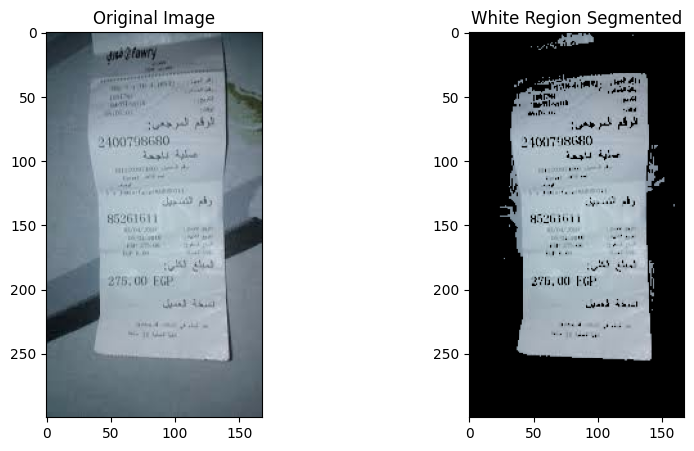

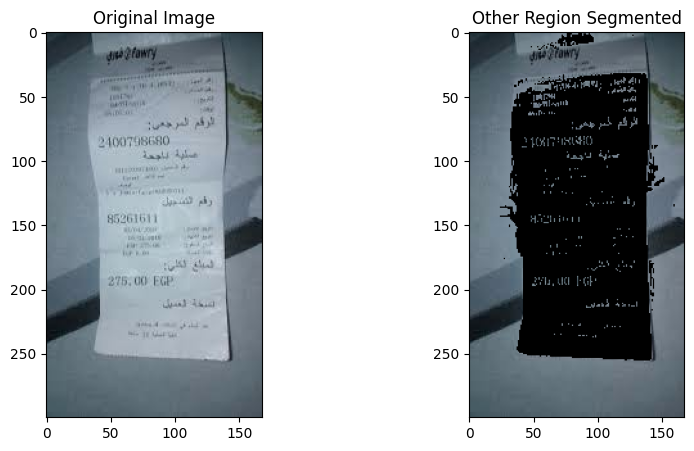

In [45]:
white_label = np.argmax(np.sum(centers, axis=1))  # Identify the white region

for i in range(2):
    mask = (labels == i)
    segmented_mask = mask.reshape(image_rgb.shape[:2])

    # Apply mask to the original image
    segmented_image = cv2.bitwise_and(image_rgb, image_rgb, mask=segmented_mask.astype(np.uint8))

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    if i == white_label:
        plt.title("White Region Segmented")
    else:
        plt.title("Other Region Segmented")
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))

    plt.show()


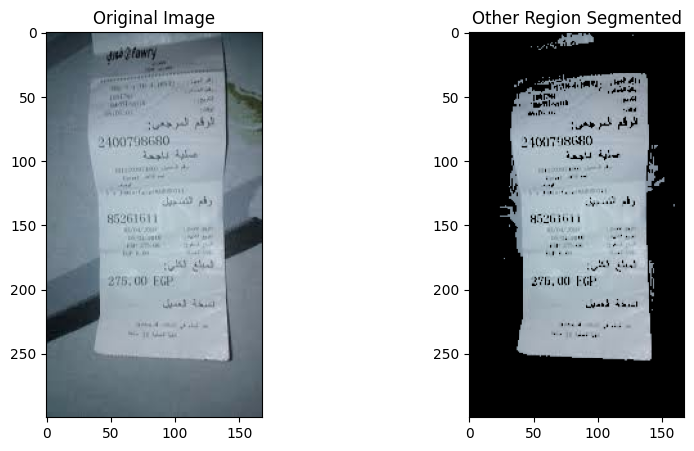

In [46]:
mask = (labels == white_label)
segmented_mask = mask.reshape(image_rgb.shape[:2])

# Apply mask to the original image
segmented_image = cv2.bitwise_and(image_rgb, image_rgb, mask=segmented_mask.astype(np.uint8))

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
if i == white_label:
    plt.title("White Region Segmented")
else:
    plt.title("Other Region Segmented")
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))

plt.show()

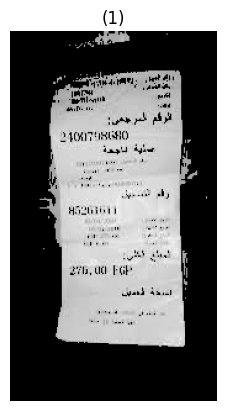

In [47]:
segmentedImageRgb = rgb2gray(segmented_image)
show_images([segmentedImageRgb])

In [48]:
print(segmentedImageRgb.max())

0.8889678431372549


In [49]:
segmentedImageRgb = (segmentedImageRgb * 255).astype('uint8')

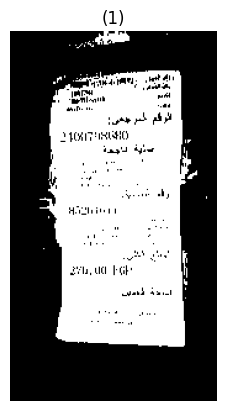

In [50]:
threshold = threshold_minimum(segmentedImageRgb)
mask = segmentedImageRgb > threshold
binarySeg = np.zeros(segmentedImageRgb.shape)
binarySeg[mask] = 255
show_images([binarySeg])